## 31 - Radar Animations

[Youtube](https://www.youtube.com/watch?v=4paJWaQkUF8)

In [1]:
from datetime import datetime, timedelta

import cartopy
import matplotlib.pyplot as plt
from metpy.plots import ctables, add_timestamp, add_metpy_logo
import numpy as np
from siphon.cdmr import Dataset

from siphon.catalog import TDSCatalog
from siphon.radarserver import RadarServer

%matplotlib inline

In [2]:
cat = TDSCatalog('http://thredds.ucar.edu/thredds/radarServer/catalog.xml')
rs = RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)
query = rs.query()
now = datetime.utcnow()
query.stations('NQA').time_range(now - timedelta(hours = 1), now).variables('N0C')

var=N0C&time_start=2022-12-22T18%3A54%3A45.874695&time_end=2022-12-22T19%3A54%3A45.874695&stn=NQA

In [3]:
query_cat = rs.get_catalog(query)
print(sorted(query_cat.datasets))

['Level3_NQA_N0C_20221222_1858.nids', 'Level3_NQA_N0C_20221222_1902.nids', 'Level3_NQA_N0C_20221222_1906.nids', 'Level3_NQA_N0C_20221222_1911.nids', 'Level3_NQA_N0C_20221222_1915.nids', 'Level3_NQA_N0C_20221222_1920.nids', 'Level3_NQA_N0C_20221222_1924.nids', 'Level3_NQA_N0C_20221222_1929.nids', 'Level3_NQA_N0C_20221222_1932.nids', 'Level3_NQA_N0C_20221222_1937.nids', 'Level3_NQA_N0C_20221222_1941.nids', 'Level3_NQA_N0C_20221222_1946.nids', 'Level3_NQA_N0C_20221222_1950.nids']


In [4]:
def plot_radar(data, field_name):

 rng = data.variables['gate'][:]
 az = data.variables['azimuth'][:]
 ref = data.variables[field_name][:]

 distance_in_degrees = 3
 ax.set_extent([data.RadarLongitude - distance_in_degrees, data.RadarLongitude + distance_in_degrees, data.RadarLatitude - distance_in_degrees, data.RadarLatitude + distance_in_degrees])

 x = rng * np.sin(np.deg2rad(az))[:, None]
 y = rng * np.cos(np.deg2rad(az))[:, None]

 norm, cmap = ctables.registry.get_with_range('Carbone42', 0, 1)

 mesh = ax.pcolormesh(x, y, ref, norm = norm, cmap = cmap, zorder = 0)

 return mesh

In [5]:
field_name = 'CorrelationCoefficient'

base_file = query_cat.datasets[0].remote_access()
print(list(base_file.variables))

['elevation', 'azimuth', 'gate', 'latitude', 'longitude', 'altitude', 'rays_time', 'CorrelationCoefficient_RAW', 'CorrelationCoefficient']


In [6]:
proj = cartopy.crs.LambertConformal(central_longitude = base_file.RadarLongitude, central_latitude = base_file.RadarLatitude)

state_borders = cartopy.feature.NaturalEarthFeature(category = 'cultural', name = 'admin_1_states_provinces_lakes', scale = '50m', facecolor = 'none')

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_li

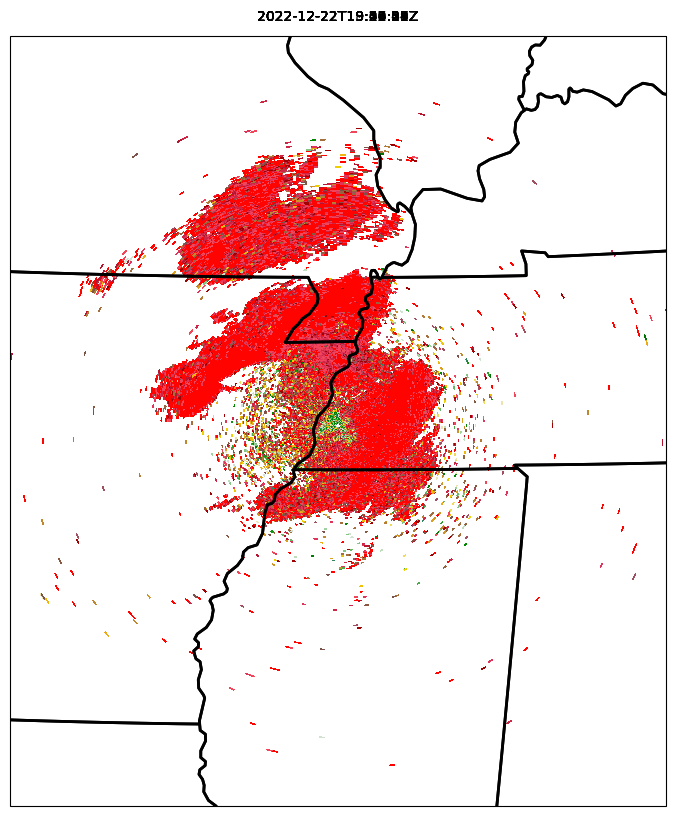

In [7]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = proj)

artist = []

ax.add_feature(state_borders, edgecolor = 'black', linewidth = 2, zorder = 2)

for ds_name in sorted(query_cat.datasets):
 ds = query_cat.datasets[ds_name]
 data = Dataset(ds.access_urls['CdmRemote'])

 field_name = [var.name for var in data.variables.values() if var.ndim >= 2and not var.name.endswith('RAW')][0]

 text = ax.text(0.5, 1.02, data.time_coverage_start, ha = 'center', transform = ax.transAxes)

 mesh = plot_radar(data, field_name)

 artist.append([text, mesh])

In [8]:
plt.rcParams['animation.html'] = 'jshtml'

from matplotlib.animation import ArtistAnimation

anim = ArtistAnimation(fig, artist, interval = 100)
anim

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
